# Geopandas Example: Plot States

### This is a simple geopandas example covering the following:
1. Basic map of the U.S.
2. Map of the U.S. with specific states highlighted
3. "Zoom" view of one state

### Import Packages & Read in Data

In [1]:
# usual packages
import os
import pandas as pd
import numpy as np

In [2]:
# map-related packages
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import fiona

In [3]:
# set working directory
working_dir = '/Users/sarahrunkle/Desktop/git_desktop/'
os.chdir(working_dir)

In [4]:
# read in the states data
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
states_file = working_dir + '/geo_data/states/states_cb_2017/cb_2017_us_state_500k.shp'
states_orig = gpd.read_file(states_file)

### Check Out Imported Data

In [5]:
# note - this is actually a geodataframe (not a pandas dataframe)
type(states_orig)

geopandas.geodataframe.GeoDataFrame

In [6]:
# check out included columns
list(states_orig)

['STATEFP',
 'STATENS',
 'AFFGEOID',
 'GEOID',
 'STUSPS',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'geometry']

In [7]:
# column types
states_orig.dtypes

STATEFP     object
STATENS     object
AFFGEOID    object
GEOID       object
STUSPS      object
NAME        object
LSAD        object
ALAND        int64
AWATER       int64
geometry    object
dtype: object

In [8]:
# dataframe shape
states_orig.shape # 56 states - clue that this includes U.S. Territories as well

(56, 10)

In [9]:
# check out the head
states_orig.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."


In [10]:
# check out the coordinate reference system
states_orig.crs # 4269

{'init': 'epsg:4269'}

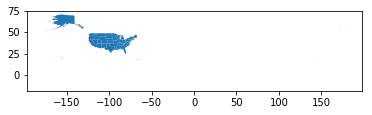

In [11]:
# plot the original data
states_orig.plot()

### Plot Basic Map of U.S.

In [12]:
# update crs to Albers Equal Area
states_data = states_orig.to_crs({'init': 'epsg:2163'})

In [13]:
# check that the crs conversion worked
states_data.crs

{'init': 'epsg:2163'}

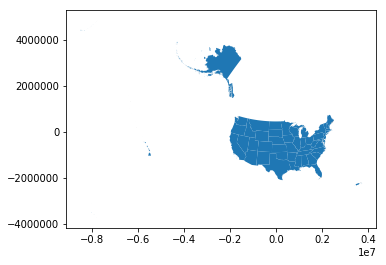

In [14]:
# plot the data again
states_data.plot() # looks pretty different now!

In [15]:
# drop columns we don't need
states_data = states_data[['STUSPS', 'NAME', 'geometry']]

In [16]:
# re-name columns
states_data = states_data.rename(columns={'STUSPS':'state_code',
                                           'NAME': 'state_name'})

In [17]:
# check out head again
states_data.head(1)

,state_code,state_name,geometry
0,WV,West Virginia,POLYGON ((1506493.502378316 -601384.4489765986...


In [18]:
# let's check out the included states
# for this map, I only want the lower 48 + DC
states_data[['state_code', 'state_name']].sort_values(by='state_code', ascending=True)

,state_code,state_name
18,AK,Alaska
53,AL,Alabama
19,AR,Arkansas
41,AS,American Samoa
24,AZ,Arizona
29,CA,California
11,CO,Colorado
5,CT,Connecticut
47,DC,District of Columbia
28,DE,Delaware


In [19]:
# right now, I just want a map of the lower 48 + DC
# get rid of data from non-mainland
non_mainland = ['GU', 'MP', 'AS', 'PR', 'HI', 'VI', 'AK']
states_data = states_data[~states_data['state_code'].isin(non_mainland)]

In [20]:
# check out the shape
states_data.shape # now, has dropped to just lower 48 + DC

(49, 3)

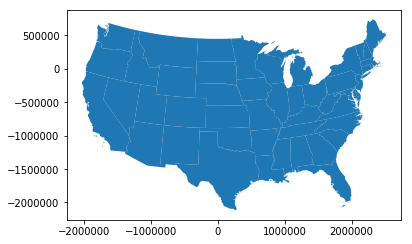

In [21]:
# now when we plot it's just the lower 48
states_data.plot()

### Create a Matplotlib Figure

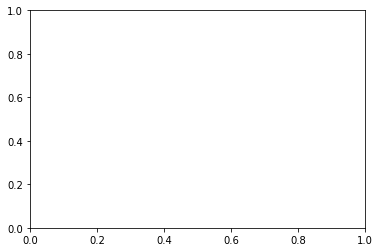

In [23]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1)

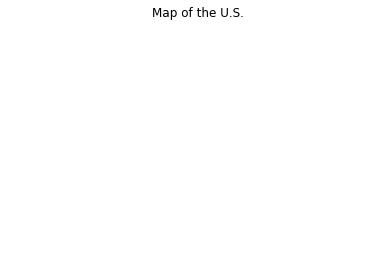

In [24]:
# get rid of axis marks
ax.axis('off')
# set title
ax.set_title('Map of the U.S.')
fig

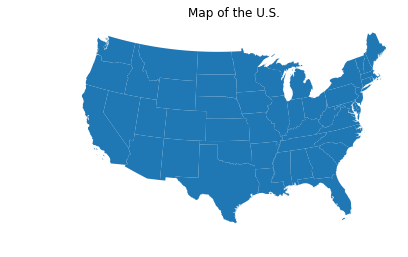

<Figure size 432x288 with 0 Axes>

In [25]:
# add the states_data in
states_data.plot(ax=ax)
fig

### Highlight Specific States

In [26]:
# select the geometry for california
cal = states_data[states_data['state_code']=='CA']['geometry']

In [27]:
# check out the data
cal

29    (POLYGON ((-1717362.708900849 -1090134.2355681...
Name: geometry, dtype: object

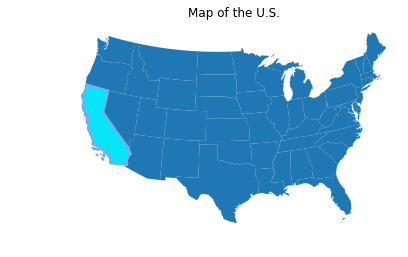

<Figure size 432x288 with 0 Axes>

In [28]:
# create cal plot within same fig
# select color codes here: https://htmlcolorcodes.com/
cal.plot(ax=ax,
         color='#09E5F8',
         linewidth=2,
         edgecolor='#7fa9e8')
fig

In [29]:
# what if I want to highlight multiple states?
states_include = ['CO','IL', 'MN', 'NJ']
states_subset = states_data[states_data['state_code'].isin(states_include)]['geometry']

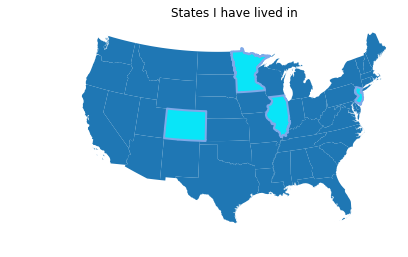

In [31]:
# create a map just for these states
fig2, ax2 = plt.subplots(1)
ax2.set_title('States I have lived in')
ax2.axis('off')
states_data.plot(ax=ax2) # note that plotting order matters -- this is now the "base" layer
states_subset.plot(ax=ax2,
                   color='#09E5F8',
                   linewidth=2,
                   edgecolor='#7fa9e8')

### Zoom to California Only

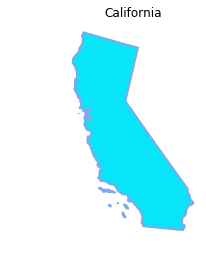

In [32]:
# create a map for just cal
fig3, ax3 = plt.subplots(1)
ax3.set_title('California')
ax3.axis('off')
cal.plot(ax=ax3,
         color='#09E5F8',
         linewidth=2,
         edgecolor='#7fa9e8')